# 4 - Introduction to Statistics: Error and Timeseries

First, let's import the libraries and data we'll need:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

NBA_regular_2021 = pd.read_csv('Data/NBA_2021-2022_stats_Regular.csv', engine='python', delimiter=';')

## 1. Error
Measures of error help us understand how accurate our predictions are. 

### Relative error
The simplest measure of error is to look at how far from the data our predictions are. Let's start by fitting a correlation in the NBA 2021 datset with a linear regression. We can consider the correlation between 2-Point Attempts (2PA) and 2-Pointers (2P) made

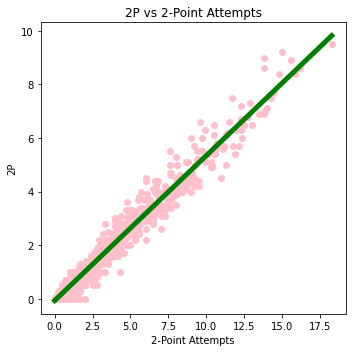

In [5]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 1, figsize=(5, 5))

# Plot positive correlation - 
independent_variable = "2PA"
dependent_variable = "2P"

# Fit a polynomial of degree 1 (linear)
#slope, y_intercept = np.polyfit(NBA_regular_2021[independent_variable], NBA_regular_2021[dependent_variable], 1)
    
# Calculate predicted values y = m* x + b
x_array = np.array(NBA_regular_2021[independent_variable]).reshape(-1, 1)
y_array = np.array(NBA_regular_2021[dependent_variable])
model = LinearRegression()
model.fit(x_array, y_array)
    
# Calculate predicted values
slope = model.coef_[0]
y_intercept = model.intercept_
#y_fit = model.predict(NBA_regular_2021[independent_variable])
x_fit_linear = np.linspace(np.min(x_array), np.max(x_array), 100)
y_fit_linear = slope * x_fit_linear + y_intercept

# Calculate R-squared
#r_squared = model.score(x_array, y_array)
#slope = 
#y_fit = slope * NBA_regular_2021[independent_variable] + y_intercept
    
# Calculate R-squared
#correlation_matrix = np.corrcoef(NBA_regular_2021[independent_variable], NBA_regular_2021[dependent_variable])
#correlation_xy = correlation_matrix[0, 1]
#r_squared = correlation_xy**2
    
axs.scatter(NBA_regular_2021[independent_variable], NBA_regular_2021[dependent_variable], color='pink')
axs.plot(x_fit_linear, y_fit_linear, color='green', linewidth=5)

axs.set_title('%s vs 2-Point Attempts' %dependent_variable)
axs.set_xlabel("2-Point Attempts")
axs.set_ylabel(dependent_variable)

plt.tight_layout()
plt.show()

The actual 2P data are stored in the array `y_array`

The 2PA data are stored in the array `x_array`

The model for our predictions is a line with slope stored in the variable `slope` and y-intercept stored in the variable `y_intercept`.

To make things easier, let's create a python function that takes in an arbitrary value of 2-Point Attempts and returns the predicted number of 2-Pointers

In [8]:
def TwoPointers_model(twopoint_attempts, slope_model, y_int_model):
    number_of_twopointers = slope_model * twopoint_attempts + y_int_model
    return number_of_twopointers

Now let's calculate the relative error between the prediction (given by `TwoPointers_model`) and the actual data

In [9]:
TwoPointers_predicted = TwoPointers_model(x_array, slope, y_intercept)

### 🔍 EXERCISE 1: Change the dependent variable to another stat you think might be interesting. Show the distribution of the stat, and the scatter between this stat and 3-Point Attempts. 3PA. Is there a potential relationship between 3-Point Attempts and this stat?

### 🔍 EXERCISE 2: Find the Pearson correlation coefficient between the stat you chose and 3PA. Is there any kind of correlation between the two variables? If there is a correlation, is it weak or strong?